# After moving the sensors

How do things look after the sensors have been positioned away from the surprise heat source? Let's look at a day's worth of data.

In [1]:
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (12, 5)
import pandas as pd

In [2]:
df = pd.read_csv('after-sensor-move.csv', header=None, names=['time', 'mac', 'f', 'h'], parse_dates=[0])

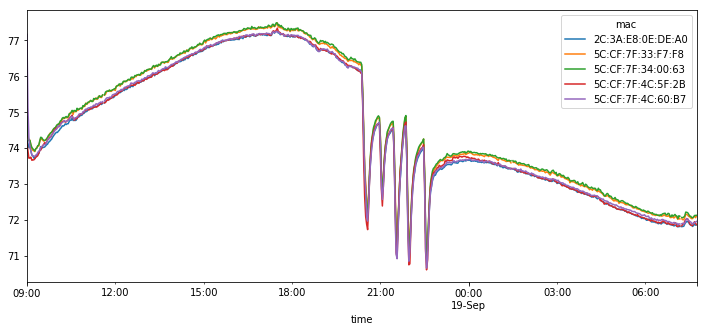

In [3]:
per_sensor_f = df.pivot(index='time', columns='mac', values='f')
downsampled_f = per_sensor_f.resample('2T').mean()
downsampled_f.plot();

Much better! The spread looks to be < 0.5F (consistent with the ±0.2C in the [specifications](https://www.sensirion.com/en/environmental-sensors/humidity-sensors/digital-humidity-sensors-for-various-applications/)). That's good enough for the needs of the project.

How did humidity fare?

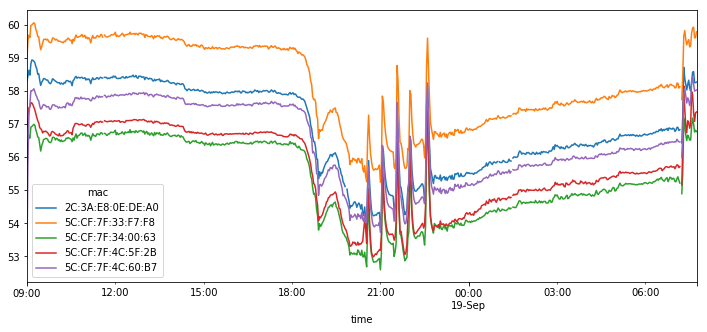

In [4]:
per_sensor_h = df.pivot(index='time', columns='mac', values='h')
downsampled_h = per_sensor_h.resample('2T').mean()
downsampled_h.plot();

Looks like about a 3% spread, which is within the ±2%RH specified range. Setting aside the minor issue of calibration, and assuming the sensors differ by a more-or-less constant amount, we should be able to normalize the readings. (Yeah, yeah, we've already downsampled...)

In [5]:
means = {}
for c in downsampled_h.columns:
    means[c] = downsampled_h[c].mean()
mean_means = sum(means.values()) / len(means)
mean_means

56.524170394088308

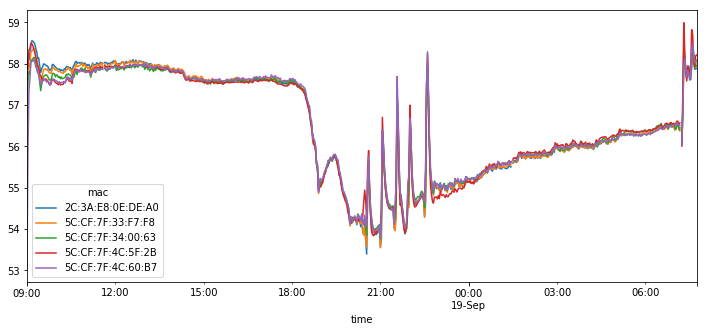

In [6]:
adjusted_h = downsampled_h.copy()
for c in adjusted_h.columns:
    adjusted_h[c] -= (means[c] - mean_means)
adjusted_h.plot();

The uptick in humidity at about 7:15am is from the shower, which is significant here because some of my best ideas come while showering. A shower thought this morning: Is the initial outlier from the first experiment explainable by differences in the inexpensive power adapters I'm using? Voltage variations from the apaters might cause the voltage regulators on the ESP8266 boards to throw off differing amounts of heat. The setup so far has been 1-1-1 sensor board to ESP8266 to power adapter. What would happen if I took the outlier setup and swapped its power adapter?

In a normal software project, this is the kind of idea that gets set aside, because things are Good Enough, and it's Time To Move On And Ship rather than delaying to investigate side curiousities (even though those side invesitigations often turn over rocks with periously unnoticed Scary Things crawling under them). But on this project, the customer, project manager, and developer all live in the same head. We got together and agreed that the educational value of trying the experiment was worth a small schedule slip.

## Next steps

With the sensor boards snapped to the ESP8266, swap power adapters. Does this explain the original outlier?